In [1]:
import pandas as pd

In [2]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.58M/6.58M [00:00<00:00, 19.3MB/s]


In [3]:
table = html_soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [4]:
# Store the table data in Python 
mars_data = []
rows = table.find_all('tr')
headers = [head.text for head in rows[0].find_all('th')]
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [5]:
for row in rows[1:]:
    row_data = row.find_all('td')
    row_dict = {}
    for i, cell in enumerate(row_data):
        row_dict[headers[i]] = cell.text.strip() 
    mars_data.append(row_dict)
mars_data


[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [6]:
df = pd.DataFrame(mars_data)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
df['sol'].describe()

count     1867
unique    1867
top         10
freq         1
Name: sol, dtype: object

In [8]:
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], format="%Y/%m/%d")
df['month'] = pd.to_datetime(df['month'], format="%m")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   datetime64[ns]
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int32(2), object(1)
memory usage: 87.6+ KB


In [20]:
df.to_csv('data.csv')

### 5. Analyze your dataset

- How many months exist on Mars?
Ther are 12 months in Mars
- How many Martian (and not Earth) days worth of data exist in the scraped dataset? 
1867 Martian days
- What are the coldest and the warmest months on Mars (at the location of Curiosity)?
Coldest is march and warmest is august
- What are the months with the lowest and highest atm pressure on Mars?
July is lowest and highest is Sept 
- About how many terrestrial (Earth) days exist in a Martian year? 
Aprox 650 days 

In [9]:
df["month"].value_counts().sort_index()

1900-01-01    174
1900-02-01    178
1900-03-01    192
1900-04-01    194
1900-05-01    149
1900-06-01    147
1900-07-01    142
1900-08-01    141
1900-09-01    134
1900-10-01    112
1900-11-01    138
1900-12-01    166
Name: month, dtype: int64

In [10]:
df["sol"].nunique()

1867

In [11]:
avg_temp = df.groupby("month")["min_temp"].mean()
avg_temp

month
1900-01-01   -77.160920
1900-02-01   -79.932584
1900-03-01   -83.307292
1900-04-01   -82.747423
1900-05-01   -79.308725
1900-06-01   -75.299320
1900-07-01   -72.281690
1900-08-01   -68.382979
1900-09-01   -69.171642
1900-10-01   -71.982143
1900-11-01   -71.985507
1900-12-01   -74.451807
Name: min_temp, dtype: float64

<AxesSubplot:xlabel='month'>

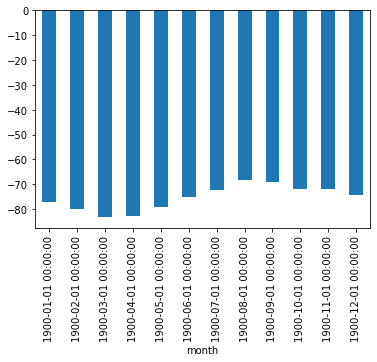

In [12]:
avg_temp.plot.bar()

<AxesSubplot:>

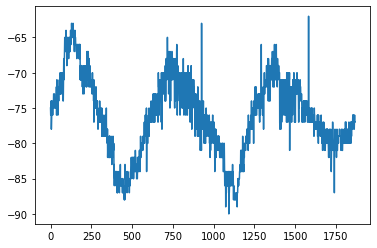

In [13]:
df["min_temp"].plot()

In [18]:
avg_press = df.groupby("month")["pressure"].mean()
avg_press

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<AxesSubplot:xlabel='month'>

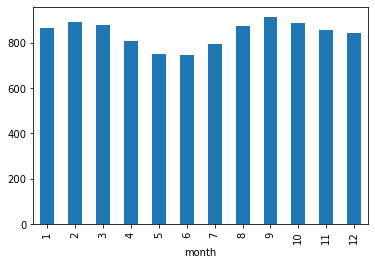

In [19]:
avg_press.plot.bar()

In [14]:
ex_dict ={ "country" : "CA", "shape":"triangle" }

In [15]:
ex_dict.values()

dict_values(['CA', 'triangle'])

In [16]:
tables = pd.read_html(url)

In [17]:
df = tables[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
